### 1. Importei as bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Carreguei o dataset

In [3]:
data = pd.read_csv('new_customers.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1965 non-null   object
 1   age              1965 non-null   int64 
 2   anual_income     1965 non-null   int64 
 3   spending_score   1965 non-null   int64 
 4   profession       1965 non-null   object
 5   work_experience  1965 non-null   int64 
 6   family_size      1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 107.6+ KB


,gender,age,anual_income,spending_score,profession,work_experience,family_size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
5,Female,22,58000,76,Artist,0,2
6,Female,35,31000,6,Healthcare,1,3
7,Female,23,84000,94,Healthcare,1,3
8,Male,64,97000,3,Engineer,0,3
9,Female,30,98000,72,Artist,1,4


### 3. Análise de Relação entre as variáveis
Pricipal variável: spending_score

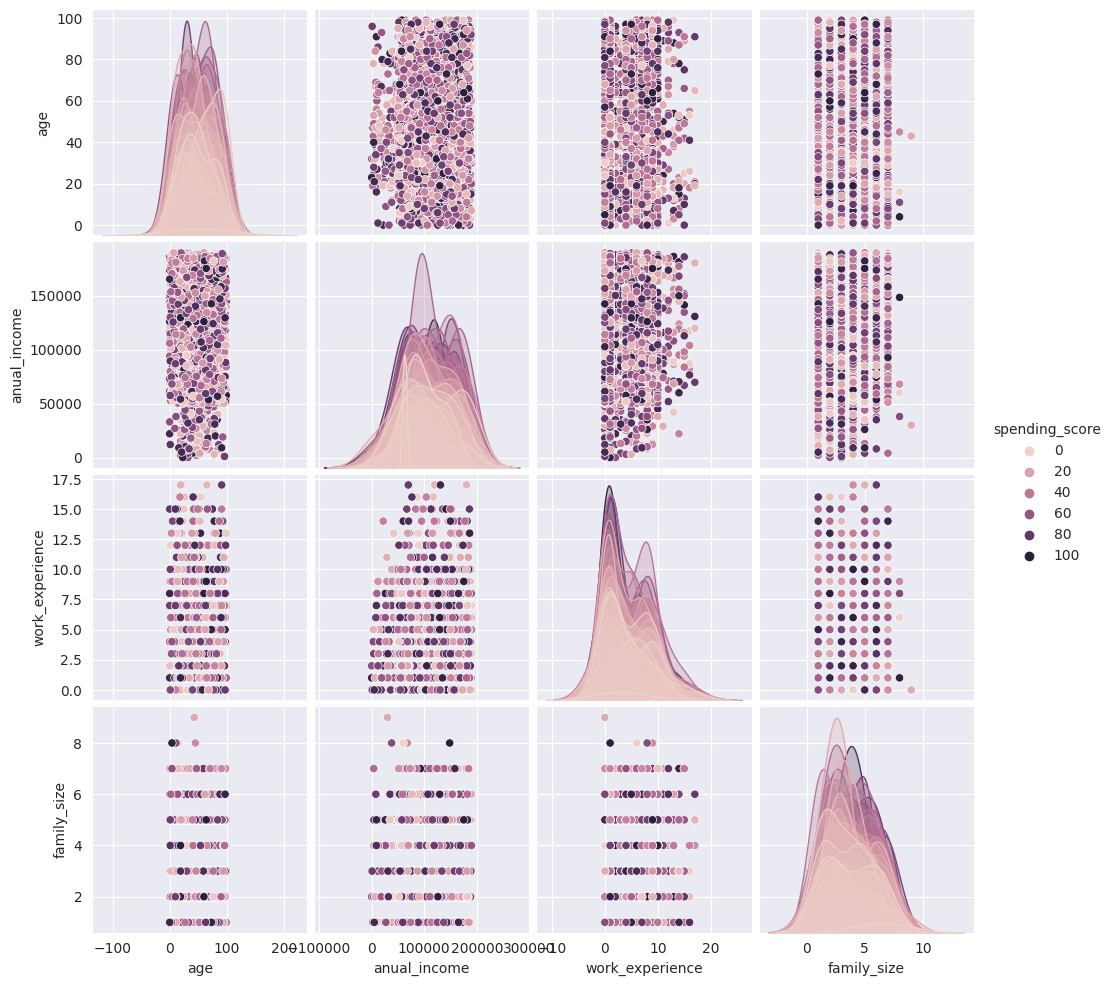

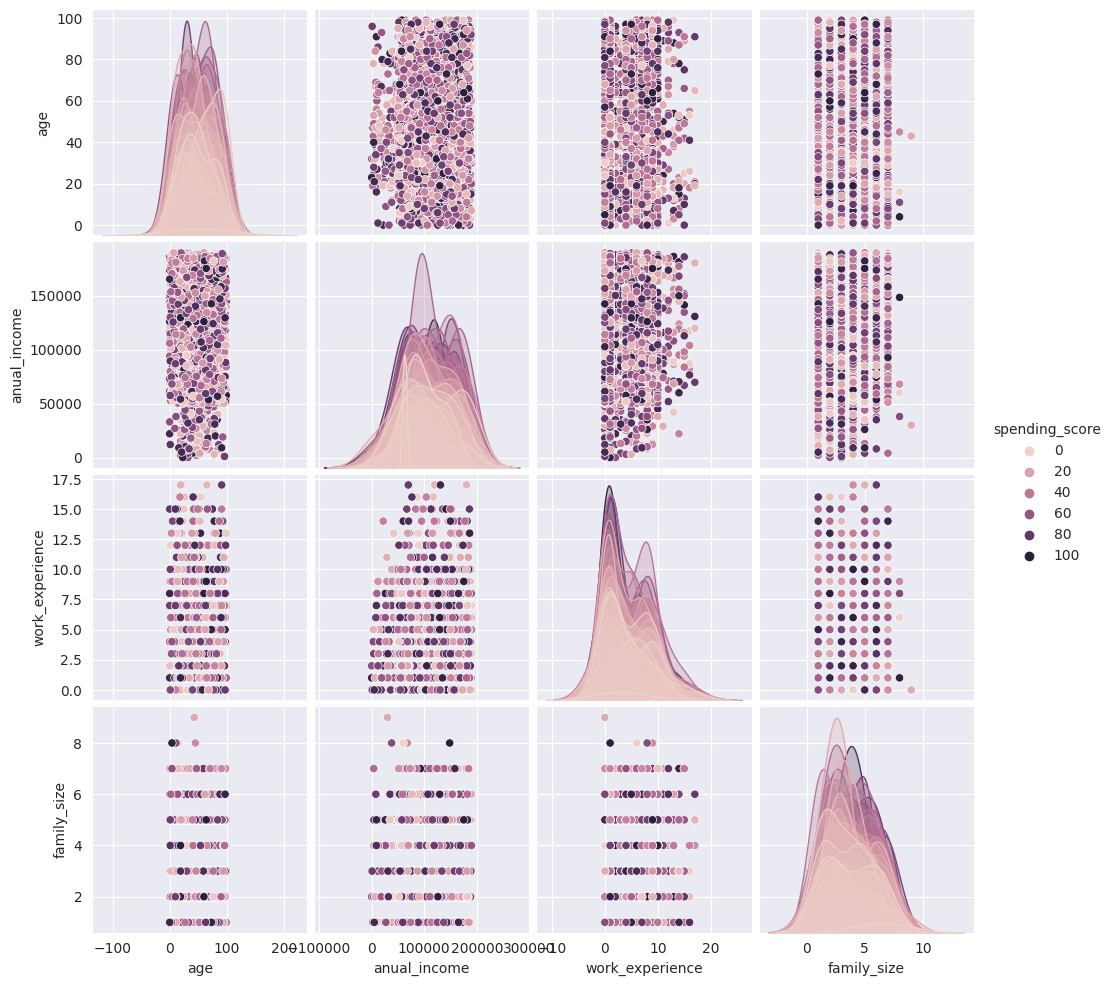

In [5]:
sns.pairplot(data, hue='spending_score')

## 4. Análise de Correlação


### 4.1. Correlação entre as variáveis

In [6]:
data.corr()

/tmp/ipykernel_5707/1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,anual_income,spending_score,work_experience,family_size
age,1.000000,0.021064,-0.037387,-0.016771,0.034810
anual_income,0.021064,1.000000,0.026716,0.087135,0.093757
spending_score,-0.037387,0.026716,1.000000,-0.025587,0.005859
work_experience,-0.016771,0.087135,-0.025587,1.000000,0.012727
family_size,0.034810,0.093757,0.005859,0.012727,1.000000


### 4.2. Heatmap de correlação

/tmp/ipykernel_5707/2211201551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.0%')


<AxesSubplot: >

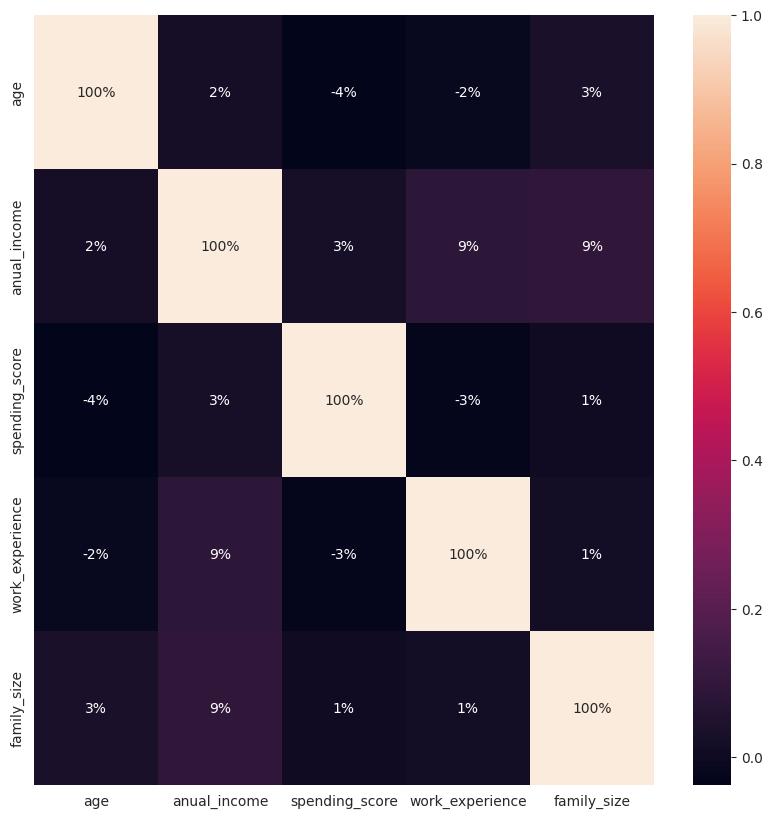

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

## 5. Análise de Clusterização com K-Means

### 5.1. Preparação dos dados
Transformar os dados string para numéricos e salvando em novo dataset.

### 5.1.2. Dropando colunas menos importantes
1. Dropando a coluna gênero;
2. Dropando a coluna profissão;
3. Work experience não será utilizada, pois não é um dado relevante para o modelo;
4. Dropando a coluna age, pois não é um dado relevante para o modelo.

In [26]:
data_cluster = data.copy()
data_cluster.head()

,gender,age,anual_income,spending_score,profession,work_experience,family_size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


### 5.1.3. Verificando o npumero de clusters ideal

/home/sidneia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sidneia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sidneia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sidneia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sidneia/.local/lib/pyt

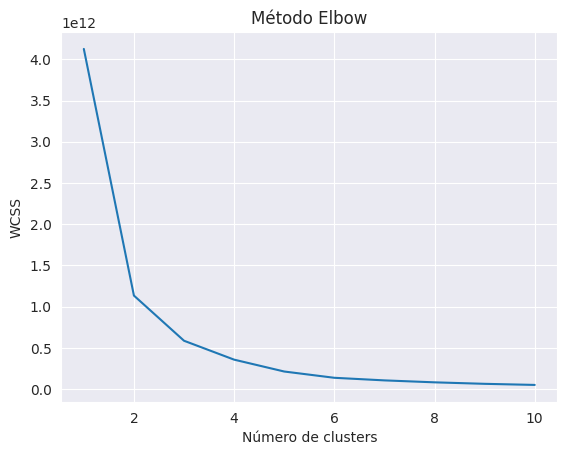

In [43]:
# Criando uma lista vazia para armazenar os valores de soma dos quadrados dentro dos clusters
wcss = []
# Criando um loop para testar diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_cluster[['spending_score', 'anual_income']])
    wcss.append(kmeans.inertia_)
# Plotando o gráfico de Elbow
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

**O número ideal de clusters é 5**

### 5.2. Aplicando o K-Means

In [27]:
# Definindo o número de clusters
k = 5
# Criando o modelo
kmeans = KMeans(n_clusters=k)
# Treinando o modelo
kmeans.fit(data_cluster[['spending_score', 'anual_income']])
# Visualizando os clusters
labels = kmeans.labels_
centros = kmeans.cluster_centers_

/home/sidneia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Adicionando os clusters ao dataset
data_cluster['cluster'] = kmeans.labels_
data_cluster.head(10)

,gender,age,anual_income,spending_score,profession,work_experience,family_size,cluster
0,Male,19,15000,39,Healthcare,1,4,3
1,Male,21,35000,81,Engineer,3,3,3
2,Female,20,86000,6,Engineer,1,1,4
3,Female,23,59000,77,Lawyer,0,2,0
4,Female,31,38000,40,Entertainment,2,6,3
5,Female,22,58000,76,Artist,0,2,0
6,Female,35,31000,6,Healthcare,1,3,3
7,Female,23,84000,94,Healthcare,1,3,4
8,Male,64,97000,3,Engineer,0,3,4
9,Female,30,98000,72,Artist,1,4,4


### 5.3. Visualizando os clusters

<AxesSubplot: xlabel='spending_score', ylabel='anual_income'>

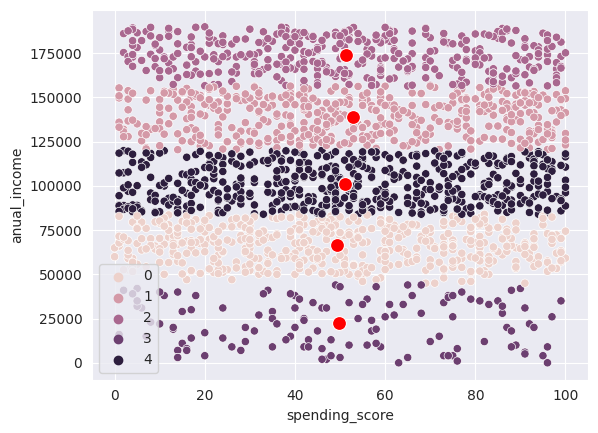

In [39]:
sns.scatterplot(x='spending_score', y='anual_income', hue='cluster', data=data_cluster)
sns.scatterplot(x=centros[:,0], y=centros[:,1], color='red', s=100)

### 5.4. Criando uma pivot table com os clusters

In [45]:
data_cluster.pivot_table(index='cluster', values=['spending_score', 'anual_income'], aggfunc='mean')

,anual_income,spending_score
cluster,,
0,66440.204409,49.204409
1,139187.011136,52.866370
2,173696.489848,51.464467
3,22357.723577,49.813008
4,101050.824000,51.352000
